In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/paysim.csv')
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
#null value check
df.isnull().values.any()


np.False_

In [ ]:
# Fraud ratio calculation
fraud_count = df['isFraud'].sum()
total_count = len(df)
fraud_ratio = fraud_count / total_count

print(f"Total transactions: {total_count:,}")
print(f"Fraudulent transactions: {fraud_count:,}")
print(f"Fraud ratio: {fraud_ratio:.4%}")


Total transactions: 6,362,620
Fraudulent transactions: 8,213
Fraud ratio: 0.1291%


In [ ]:
import plotly.graph_objects as go

#fraud by type of transaction

fraud_ratio_by_type = df.groupby("type")["isFraud"].mean().reset_index()
fraud_ratio_by_type["fraud_ratio"] = fraud_ratio_by_type["isFraud"] * 100

# Pie chart
fig = go.Figure(data=[go.Pie(
    labels=fraud_ratio_by_type["type"],
    values=fraud_ratio_by_type["fraud_ratio"],
    hole=0.4,  # makes it a donut chart
    textinfo='label+percent',
    insidetextorientation='radial'
)])

fig.update_layout(
    title_text="Fraud Ratio by Transaction Type",
    annotations=[dict(text='Fraud %', x=0.5, y=0.5, font_size=14, showarrow=False)]
)

fig.show()

In [ ]:
#amount of fraud by type

transfer=df.loc[(df.isFraud==1) & (df.type=='TRANSFER')]
cash_out=df.loc[(df.isFraud==1) & (df.type=='CASH_OUT')]
print('Fraudulent Transfers',len(transfer))
print('Fraudulent Cash Outs',len(cash_out))

Fraudulent Transfers 4097
Fraudulent Cash Outs 4116


In [ ]:
print("Transfers where isFraud is set",len(transfer))
print("Tranfers where isFlaggedFraud set",len(df.loc[df.isFlaggedFraud==1]))

Transfers where isFraud is set 4097
Tranfers where isFlaggedFraud set 16


In [ ]:
notfraud = df.loc[df.isFraud == 0]

print(
    transfer.loc[
        transfer.nameDest.isin(
            notfraud.loc[notfraud.type=='CASH_OUT'].nameOrig.drop_duplicates()
        )
    ]
)


         step      type      amount     nameOrig  oldbalanceOrg  \
1030443    65  TRANSFER  1282971.57  C1175896731     1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649      214793.32   
6362556   738  TRANSFER   814689.88  C2029041842      814689.88   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


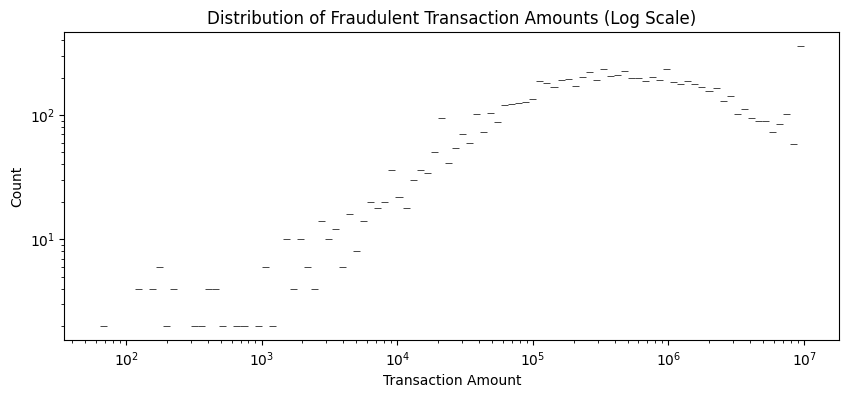

In [ ]:
# Amount Analyis based on Fraud

plt.figure(figsize=(10,4))
sns.histplot(fraud_df['amount'], bins=100, log_scale=(True, True), color='red')
plt.title("Distribution of Fraudulent Transaction Amounts (Log Scale)")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()


In [ ]:
print("Transaction amount stats for frauds:")
print(fraud_df['amount'].describe())

Transaction amount stats for frauds:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64


In [ ]:
fraud = df[df['isFraud'] == 1]

q95 = df['amount'].quantile(0.95)
q99 = df['amount'].quantile(0.99)
print("\nHigh amounts:")
print("Above 95th percentile (fraud):", (fraud['amount']>q95).mean())
print("Above 99th percentile (fraud):", (fraud['amount']>q99).mean())



High amounts:
Above 95th percentile (fraud): 0.46304638986971874
Above 99th percentile (fraud): 0.2397418726409351


In [ ]:
#Check that there are no negative amounts
print("Number of transactions where the transaction amount is negative: " + str(sum(df['amount'] < 0)))

#Check instances where transacted amount is 0
print("Number of transactions where the transaction amount is 0: " + str(sum(df['amount'] == 0)))

Number of transactions where the transaction amount is negative: 0
Number of transactions where the transaction amount is 0: 16


In [ ]:
num_zero_amount = (df['amount'] == 0).sum()
print("Number of transactions where the transaction amount is 0:", num_zero_amount)

# Show the actual rows (optional)
zero_amount_tx = df[df['amount'] == 0]
print(zero_amount_tx.head(10))

Number of transactions where the transaction amount is 0: 16
         step      type  amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2736447   212  CASH_OUT     0.0  C1510987794            0.0             0.0   
3247298   250  CASH_OUT     0.0   C521393327            0.0             0.0   
3760289   279  CASH_OUT     0.0   C539112012            0.0             0.0   
5563714   387  CASH_OUT     0.0  C1294472700            0.0             0.0   
5996408   425  CASH_OUT     0.0   C832555372            0.0             0.0   
5996410   425  CASH_OUT     0.0    C69493310            0.0             0.0   
6168500   554  CASH_OUT     0.0    C10965156            0.0             0.0   
6205440   586  CASH_OUT     0.0  C1303719003            0.0             0.0   
6266414   617  CASH_OUT     0.0  C1971175979            0.0             0.0   
6281483   646  CASH_OUT     0.0  C2060908932            0.0             0.0   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlag

In [ ]:
# Count total and fraud transactions
total_zero_amount = len(zero_amount_tx)
fraud_zero_amount = zero_amount_tx['isFraud'].sum()  # sum of 1's = number of fraud

# Compute percentage
fraud_percentage = (fraud_zero_amount / total_zero_amount) * 100

In [ ]:
print(f"Total zero-amount transactions: {total_zero_amount}")
print(f"Number of zero-amount transactions that are fraud: {fraud_zero_amount}")
print(f"Percentage of zero-amount transactions that are fraud: {fraud_percentage:.2f}%")

Total zero-amount transactions: 16
Number of zero-amount transactions that are fraud: 16
Percentage of zero-amount transactions that are fraud: 100.00%


In [ ]:
df['hour'] = df['step'] % 24
df['day'] = df['step'] // 24
df['day_of_month'] = (df['day'] % 30) + 1
df['weekend'] = df['day'] % 7

fraud = df[df['isFraud'] == 1]
total_fraud = len(fraud)

In [ ]:
X = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()

In [ ]:
X['type'] = X['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})


In [ ]:
Xfraud = X[X['isFraud'] == 1]
Xnonfraud = X[X['isFraud'] == 0]

In [ ]:
# Balance Calculations

def empty_dest_fraction(df_subset):
    count = df_subset[(df_subset['oldbalanceDest'] == 0) &
                      (df_subset['newbalanceDest'] == 0)].shape[0]
    total = df_subset.shape[0]
    return count / total if total > 0 else 0

fraud_frac = empty_dest_fraction(Xfraud)
nonfraud_frac = empty_dest_fraction(Xnonfraud)

print(f"Fraction of fraudulent transactions with empty destination accounts: {fraud_frac:.4%}")
print(f"Fraction of non-fraudulent transactions with empty destination accounts: {nonfraud_frac:.4%}")

Fraction of fraudulent transactions with empty destination accounts: 49.6286%
Fraction of non-fraudulent transactions with empty destination accounts: 0.0618%


In [ ]:
def empty_dest_with_amount(df_subset):
    count = df_subset[(df_subset['oldbalanceDest'] == 0) &
                      (df_subset['newbalanceDest'] == 0) &
                      (df_subset['amount'] > 0)].shape[0]
    total = df_subset.shape[0]
    return count / total if total > 0 else 0


fraud_empty_amount = empty_dest_with_amount(Xfraud)
nonfraud_empty_amount = empty_dest_with_amount(Xnonfraud)

print("\nFractions and amount > 0 check:")
print(f"Fraudulent: {fraud_empty_amount:.4%}, Non-Fraudulent: {nonfraud_empty_amount:.4%}")


Fractions and amount > 0 check:
Fraudulent: 49.5556%, Non-Fraudulent: 0.0618%


In [ ]:
fraud = df[df['isFraud'] == 1]

q95 = df['amount'].quantile(0.95)
q99 = df['amount'].quantile(0.99)
print("\nHigh amounts:")
print("Above 95th percentile (fraud):", (fraud['amount']>q95).mean())
print("Above 99th percentile (fraud):", (fraud['amount']>q99).mean())


High amounts:
Above 95th percentile (fraud): 0.46304638986971874
Above 99th percentile (fraud): 0.2397418726409351


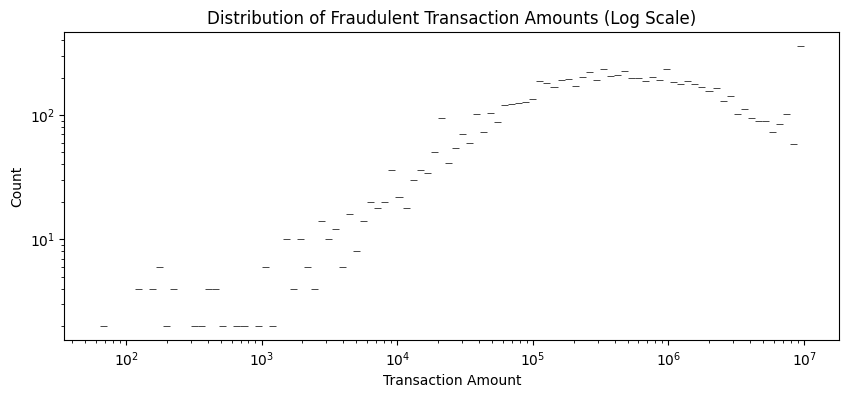

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64


In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(fraud_df['amount'], bins=100, log_scale=(True, True))
plt.title("Distribution of Fraudulent Transaction Amounts (Log Scale)")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

# Check summary statistics
print(fraud_df['amount'].describe())


In [ ]:
# Fraction of frauds where destination account has zero balance
empty_dest_count = ((fraud_df['oldbalanceDest']==0) & (fraud_df['newbalanceDest']==0)).sum()
print(f"Fraction of fraud transactions with empty destination accounts: {empty_dest_count/len(fraud_df)*100:.2f}%")

# Fraction of frauds where origin account balance becomes zero after transaction
drained_origin_count = (fraud_df['newbalanceOrig']==0).sum()
print(f"Fraction of fraud transactions where sender's balance drops to zero: {drained_origin_count/len(fraud_df)*100:.2f}%")


Fraction of fraud transactions with empty destination accounts: 49.63%
Fraction of fraud transactions where sender's balance drops to zero: 98.05%


 ZERO BALANCE DESTINATIONS:
Transactions to zero-balance destinations: 2,317,276
Fraud rate with zero-balance destinations: 0.18%
Fraud rate with normal destinations: 0.10%
Risk multiplier: 1.71x
ACCOUNT DRAINING PATTERNS:
Drain pattern transactions: 1,188,074
Fraud rate in drain patterns: 0.67%
FULL TRANSFER PATTERNS:
Full transfer transactions: 3,943
Fraud rate in full transfers: 100.00%


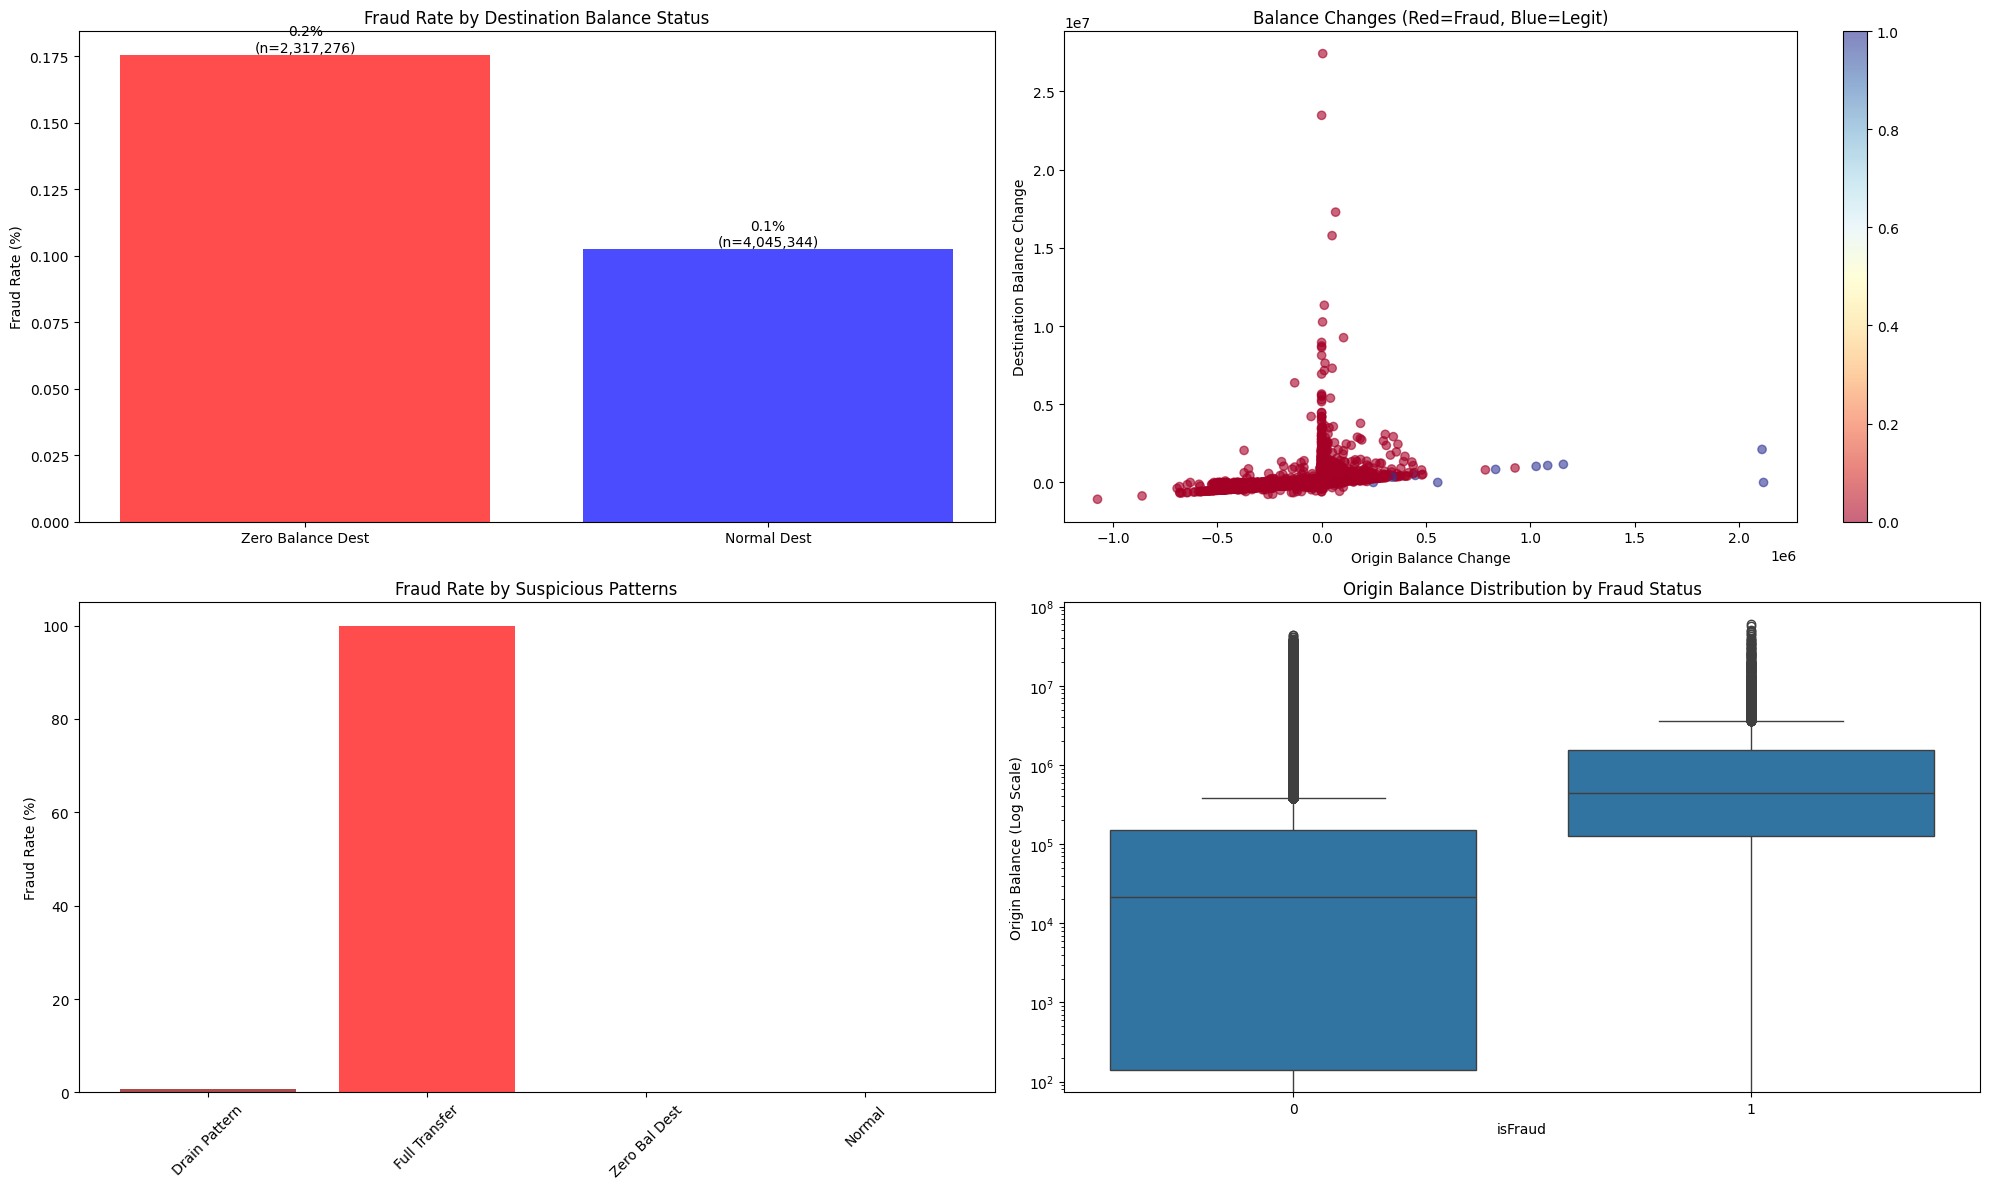

In [ ]:
# Zero balance destination analysis -
zero_bal_dest = (df['newbalanceDest'] == 0) & (df['oldbalanceDest'] == 0) & (df['amount'] > 0)
zero_bal_fraud_rate = df[zero_bal_dest]['isFraud'].mean() * 100
normal_bal_fraud_rate = df[~zero_bal_dest]['isFraud'].mean() * 100

print(f" Zero balance destinations:")
print(f"Transactions to zero-balance destinations: {zero_bal_dest.sum():,}")
print(f"Fraud rate with zero-balance destinations: {zero_bal_fraud_rate:.2f}%")
print(f"Fraud rate with normal destinations: {normal_bal_fraud_rate:.2f}%")
print(f"Risk multiplier: {zero_bal_fraud_rate/normal_bal_fraud_rate:.2f}x")

risky_types = df['type'].isin(['TRANSFER', 'CASH_OUT'])
drain_pattern = (df['newbalanceOrig'] == 0) & (df['oldbalanceOrg'] > 0) & risky_types
drain_fraud_rate = df[drain_pattern]['isFraud'].mean() * 100

print(f"Account 'drain' patterns:")
print(f"Drain pattern transactions: {drain_pattern.sum():,}")
print(f"Fraud rate in drain patterns: {drain_fraud_rate:.2f}%")

full_transfer = (df['oldbalanceOrg'] == df['amount']) & (df['type'] == 'TRANSFER')
full_transfer_fraud_rate = df[full_transfer]['isFraud'].mean() * 100

print(f" Drain Transfer patterns:")
print(f"Full transfer transactions: {full_transfer.sum():,}")
print(f"Fraud rate in full transfers: {full_transfer_fraud_rate:.2f}%")

df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

balance_comparison = pd.DataFrame({
    'Destination_Type': ['Zero Balance Dest', 'Normal Dest'],
    'Fraud_Rate': [zero_bal_fraud_rate, normal_bal_fraud_rate],
    'Count': [zero_bal_dest.sum(), (~zero_bal_dest).sum()]
})

bars = axes[0,0].bar(balance_comparison['Destination_Type'],
                    balance_comparison['Fraud_Rate'],
                    color=['red', 'blue'], alpha=0.7)
axes[0,0].set_title('Fraud Rate by Destination Balance Status')
axes[0,0].set_ylabel('Fraud Rate (%)')

for i, (bar, count) in enumerate(zip(bars, balance_comparison['Count'])):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height,
                  f'{height:.1f}%\n(n={count:,})',
                  ha='center', va='bottom')

df_sample = df.sample(min(10000, len(df)))
scatter = axes[0,1].scatter(df_sample['balance_change_orig'],
                           df_sample['balance_change_dest'],
                           c=df_sample['isFraud'],
                           alpha=0.6, cmap='RdYlBu')
axes[0,1].set_xlabel('Origin Balance Change')
axes[0,1].set_ylabel('Destination Balance Change')
axes[0,1].set_title('Balance Changes (Red=Fraud, Blue=Legit)')
plt.colorbar(scatter, ax=axes[0,1])

# Drain pattern analysis
pattern_comparison = pd.DataFrame({
    'Pattern': ['Drain Pattern', 'Full Transfer', 'Zero Bal Dest', 'Normal'],
    'Fraud_Rate': [
        drain_fraud_rate,
        full_transfer_fraud_rate,
        zero_bal_fraud_rate,
        df['isFraud'].mean() * 100
    ],
    'Count': [
        drain_pattern.sum(),
        full_transfer.sum(),
        zero_bal_dest.sum(),
        len(df)
    ]
})

bars = axes[1,0].bar(pattern_comparison['Pattern'],
                    pattern_comparison['Fraud_Rate'],
                    color=['darkred', 'red', 'orange', 'blue'], alpha=0.7)
axes[1,0].set_title('Fraud Rate by Suspicious Patterns')
axes[1,0].set_ylabel('Fraud Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Balance distribution by fraud status
df_nonzero = df[(df['oldbalanceOrg'] > 0) | (df['oldbalanceDest'] > 0)]

sns.boxplot(data=df_nonzero, x='isFraud', y='oldbalanceOrg', ax=axes[1,1])
axes[1,1].set_yscale('log')
axes[1,1].set_title('Origin Balance Distribution by Fraud Status')
axes[1,1].set_ylabel('Origin Balance (Log Scale)')

plt.tight_layout()
plt.show()

In [ ]:
if 'hour' not in df.columns:
    df['hour'] = df['step'] % 24
if 'day' not in df.columns:
    df['day'] = (df['step'] // 24) % 31

hourly_fraud = df.groupby('hour')['isFraud'].agg(['count', 'sum', 'mean'])
hourly_fraud.columns = ['Total', 'Fraud_Count', 'Fraud_Rate']
hourly_fraud['Fraud_Rate_Percent'] = hourly_fraud['Fraud_Rate'] * 100

print(" Hourly Fraud Patterns:")
print(hourly_fraud.round(3))

# Night hours analysis (0-6 AM)
night_hours = (df['hour'] >= 0) & (df['hour'] <= 6)
night_fraud_rate = df[night_hours]['isFraud'].mean() * 100
day_fraud_rate = df[~night_hours]['isFraud'].mean() * 100

print(f" Night hours analysis (0-6 AM):")
print(f"Night time transactions: {night_hours.sum():,}")
print(f"Night time fraud rate: {night_fraud_rate:.2f}%")
print(f"Day time fraud rate: {day_fraud_rate:.2f}%")
print(f"Night risk multiplier: {night_fraud_rate/day_fraud_rate:.2f}x")

daily_fraud = df.groupby('day')['isFraud'].agg(['count', 'sum', 'mean'])
daily_fraud.columns = ['Total', 'Fraud_Count', 'Fraud_Rate']
daily_fraud['Fraud_Rate_Percent'] = daily_fraud['Fraud_Rate'] * 100

# Weekend analysis (assuming days 5,6 are weekends in your 31-day cycle)
weekend_days = df['day'].isin([5, 6])
weekend_fraud_rate = df[weekend_days]['isFraud'].mean() * 100
weekday_fraud_rate = df[~weekend_days]['isFraud'].mean() * 100

print(f"Weekend vs. Weekday analysis (Days 5,6):")
print(f"Weekend transactions: {weekend_days.sum():,}")
print(f"Weekend fraud rate: {weekend_fraud_rate:.2f}%")
print(f"Weekday fraud rate: {weekday_fraud_rate:.2f}%")

# Transaction burst analysis - INSIGHT FOR Sym_StepBurst
step_counts = df['step'].value_counts()
burst_threshold = step_counts.quantile(0.99)

print(f" Transaction Burst Analysis:")
print(f"99th percentile of transactions per step: {burst_threshold:.0f}")
print(f"Steps with burst activity: {(step_counts > burst_threshold).sum()}")

# Analyze fraud rate during burst periods
df['step_count'] = df['step'].map(step_counts)
burst_periods = df['step_count'] > burst_threshold
burst_fraud_rate = df[burst_periods]['isFraud'].mean() * 100
normal_fraud_rate = df[~burst_periods]['isFraud'].mean() * 100

print(f"Fraud rate during burst periods: {burst_fraud_rate:.2f}%")
print(f"Fraud rate during normal periods: {normal_fraud_rate:.2f}%")


 Hourly Fraud Patterns:
       Total  Fraud_Count  Fraud_Rate  Fraud_Rate_Percent
hour                                                     
0      71587          300       0.004               0.419
1      27111          358       0.013               1.320
2       9018          372       0.041               4.125
3       2007          326       0.162              16.243
4       1241          274       0.221              22.079
5       1641          366       0.223              22.303
6       3420          358       0.105              10.468
7       8988          328       0.036               3.649
8      26915          368       0.014               1.367
9     283518          341       0.001               0.120
10    425729          375       0.001               0.088
11    445992          324       0.001               0.073
12    483418          339       0.001               0.070
13    468474          346       0.001               0.074
14    439653          353       0.001           

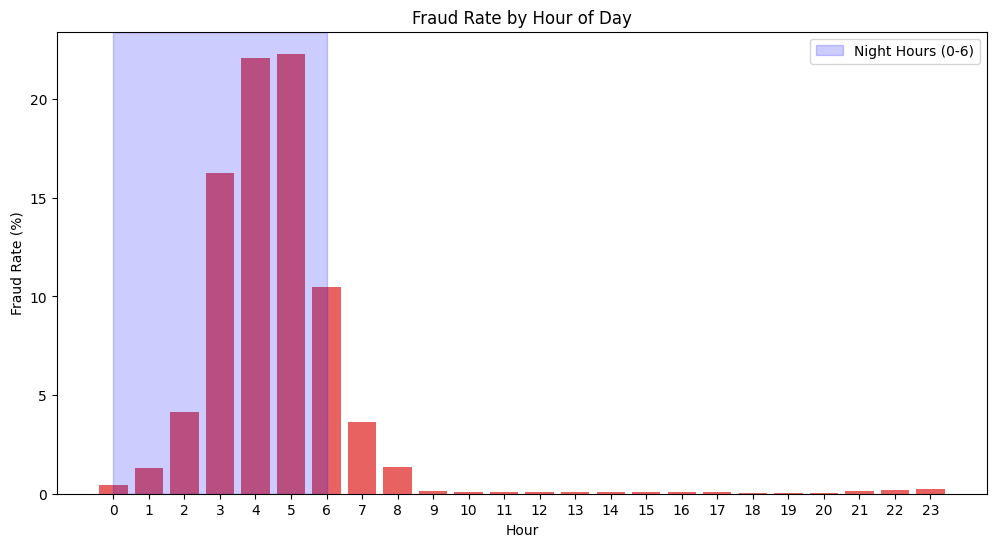

In [ ]:
hourly_stats = df.groupby('hour')['isFraud'].agg(['count', 'sum', 'mean'])
hourly_stats['Fraud_Rate_Percent'] = hourly_stats['mean'] * 100

plt.figure(figsize=(12,6))
sns.barplot(x=hourly_stats.index, y=hourly_stats['Fraud_Rate_Percent'], color='red', alpha=0.7)
plt.axvspan(0, 6, alpha=0.2, color='blue', label='Night Hours (0-6)')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate (%)')
plt.legend()
plt.show()

In [ ]:
night = df['hour'].between(0,6)
night_rate = df[night]['isFraud'].mean() * 100
day_rate = df[~night]['isFraud'].mean() * 100
risk_multiplier = night_rate / day_rate

print(f"Night fraud rate: {night_rate:.2f}%")
print(f"Day fraud rate: {day_rate:.2f}%")
print(f"Night vs Day risk multiplier: {risk_multiplier:.2f}x")


Night fraud rate: 2.03%
Day fraud rate: 0.09%
Night vs Day risk multiplier: 21.63x


In [ ]:
tx_per_step = fraud_df.groupby('step').size()
burst_threshold = tx_per_step.quantile(0.99)
burst_steps_count = sum(tx_per_step[tx_per_step > burst_threshold])
print(f"Percentage of fraudulent transactions in burst steps: {burst_steps_count / total_fraud * 100:.2f}%")


Percentage of fraudulent transactions in burst steps: 2.56%
